In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
from scipy.optimize import curve_fit

# Q1

In [115]:
def RK4(f, E, x_in, x_f, h, y0):
    n = int(abs(x_f-x_in)//abs(h))
    #X = np.linspace(x_in,x_f,n, endpoint = True)
    X = np.arange(x_in,x_f+h,h)
    Y = np.zeros((len(X),2))
    Y[0] = y0
    for i in range(1,len(X)):
        x = X[i-1]
        y = Y[i-1]
        k1 = h*f(x,y,E)
        k2 = h*f(x+h/2,y+k1/2,E)
        k3 = h*f(x+h/2,y+k2/2,E)
        k4 = h*f(x+h/2,y+k3,E)
        Y[i] = Y[i-1] + (k1 + 2*k2 + 2*k3 + k4)/6
    return Y

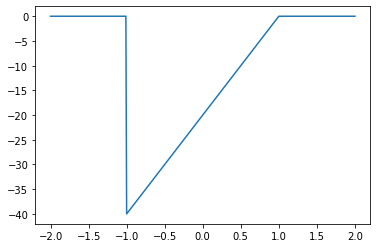

In [116]:
V0 = 40
l0 = 1
def V(x):
    if abs(x)<=l0:
        return -(1/2)*V0*(1-x)
        #return -V0
    else:
        return 0
    
f = lambda x,y,E: np.array([y[1], -(E - V(x)) * y[0]])

x_in = -2
x_f = 2
h = 1e-2
X = np.arange(x_in,x_f+h,h)
plt.plot(X,[V(i) for i in X])

In [117]:
def score(E,h):
    x_l = -2; x_r = 2
    x_0 = -1
    y0l = [0,0.01]; y0r = [0,0.01]
    y_left = RK4(f, E, x_l, x_0, h, y0l)[-1]
    y_right = RK4(f, E, x_r, x_0, -h, y0r)[-1]
    return (y_left[0]*y_right[1]/y_right[0] - y_left[1])


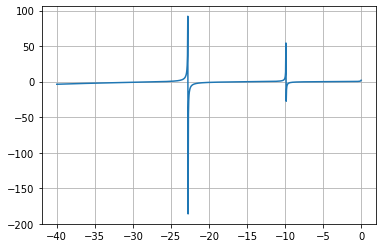

In [118]:
h = 1e-2
E = np.linspace(-40,0,1000, endpoint=True)
S = [score(e,h) for e in E]
plt.grid()

plt.plot(E,S)

In [119]:
def coarse(xv,yv):
    l=[]
    for i in range(len(yv)-1):
        if yv[i]*yv[i+1]<=0:
            l.append([xv[i],xv[i+1]])
    return l

In [120]:
intv = coarse(E,S)
intv

[[-26.146146146146144, -26.106106106106104],
 [-22.782782782782782, -22.74274274274274],
 [-13.533533533533532, -13.493493493493492],
 [-9.88988988988989, -9.84984984984985],
 [-3.6036036036036023, -3.5635635635635623]]

In [121]:
def score1(E):
    x_l = -2; x_r = 2
    x_0 = -1
    h = 1e-4
    y0l = [0,0.01]; y0r = [0,0.01]
    y_left = RK4(f, E, x_l, x_0, h, y0l)[-1]
    y_right = RK4(f, E, x_r, x_0, -h, y0r)[-1]
    return (y_left[0]*y_right[1]/y_right[0] - y_left[1])


In [122]:
def secant(f,xv,tol):
    x1,x2= xv[0],xv[1]
    root=x2
    while True:
        x0 = (x1*f(x2) - x2*f(x1))/(f(x2) - f(x1))
        x1 = x2
        x2 = x0
        root = x2
        if abs(x1-x2)<tol:
            break
    return root

In [123]:
tol = 1e-6
eigen = [secant(score1,intv[0],tol),
        secant(score1,intv[2],tol),
        secant(score1,intv[4],tol)]
eigen

[-26.128327538580034, -13.539427620129494, -3.5796454014389267]

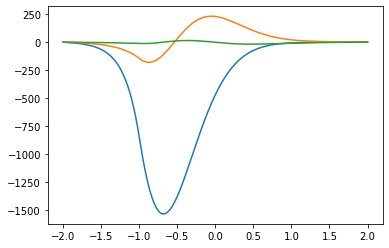

In [129]:
for e in eigen[:]:
    x_l = -2; x_r = 2
    h = 1e-4
    y0 = [0,-e*x_l]
    y = RK4(f, e, x_l, x_r, h, y0)
    plt.plot(np.linspace(-2,2,len(y)), y[:,0])
plt.show()

In [127]:
def norm(xv,yv):
    X = xv
    Y = [y**2 for y in yv]
    s = 0 
    i = 0
    while i<(len(X)-2):
        s+=(2/3)*(Y[i]+4*Y[i+1]+Y[i+2])*(X[i+2]-X[i])
        i+=2
    return (1/np.sqrt(s))

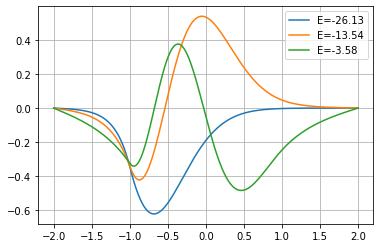

In [135]:
for e in eigen[:]:
    x_l = -2; x_r = 2
    h = 1e-4
    y0 = [0,-e*x_l]
    yv = RK4(f, e, x_l, x_r, h, y0)
    xv = np.linspace(-2,2,len(yv))
    y = norm(xv,yv)*yv
    plt.plot(xv, y[:,0], label = "E=%0.2f"%round(e,2))

plt.legend()
plt.grid()
plt.show()


# Q2

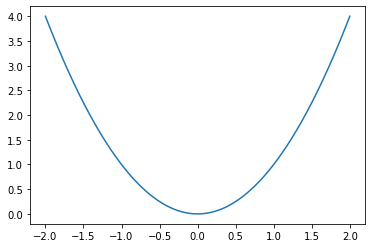

In [187]:
V = lambda x: x**2
f = lambda x,y,E: np.array([y[1], -(E - V(x)) * y[0]])

x_in = -2
x_f = 2
h = 1e-2
X = np.arange(x_in,x_f+h,h)
plt.plot(X,[V(i) for i in X])

In [205]:
def score(E,h):
    x_l = -np.sqrt(E)-3 ; x_r = -x_l
    x_0 = np.sqrt(E)
    y0l = [0,0.1]; y0r = [0,0.1]
    y_left = RK4(f, E, x_l, x_0, h, y0l)[-1]
    y_right = RK4(f, E, x_r, x_0, -h, y0r)[-1]
    return (y_left[0]*y_right[1]/y_right[0] - y_left[1])

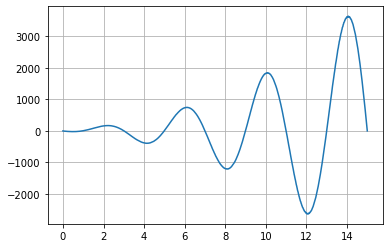

In [206]:
h = 1e-2
E = np.linspace(0,15,1000, endpoint=True)
S = [score(e,h) for e in E]
plt.grid()

plt.plot(E,S)

In [207]:
intv = coarse(E,S)
intv

[[0.990990990990991, 1.006006006006006],
 [2.987987987987988, 3.003003003003003],
 [4.984984984984985, 5.0],
 [6.996996996996997, 7.012012012012012],
 [8.993993993993994, 9.00900900900901],
 [10.99099099099099, 11.006006006006006],
 [12.987987987987989, 13.003003003003004],
 [14.984984984984985, 15.0]]

In [212]:
def score2(E):
    x_l = -np.sqrt(E)-3 ; x_r = -x_l
    x_0 = np.sqrt(E)
    h = 1e-4
    y0l = [0,0.01]; y0r = [0,0.01]
    y_left = RK4(f, E, x_l, x_0, h, y0l)[-1]
    y_right = RK4(f, E, x_r, x_0, -h, y0r)[-1]
    return ((y_left[0]/y_right[0])*y_right[1] - y_left[1])


In [213]:
tol = 1e-4
eigen1=[]
for it in intv[:3]:
    eigen1.append(secant(score2,it,tol))
eigen1

[0.9999935443886615, 3.0000006530434087, 4.999988706406524]

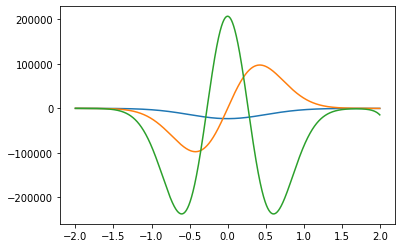

In [214]:
for e in eigen1[:]:
    x_l = -np.sqrt(e)-3 ; x_r = -x_l
    h = 1e-4
    y0 = [0,-(e-V(x_l))*x_l]
    y = RK4(f, e, x_l, x_r, h, y0)
    plt.plot(np.linspace(-2,2,len(y)), y[:,0])
plt.show()

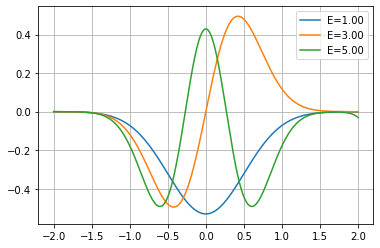

In [215]:
for e in eigen1[:]:
    x_l = -np.sqrt(e)-3 ; x_r = -x_l
    h = 1e-4
    y0 = [0,-(e-V(x_l))*x_l]
    yv = RK4(f, e, x_l, x_r, h, y0)
    xv = np.linspace(-2,2,len(yv))
    y = norm(xv,yv)* yv
    plt.plot(xv, y[:,0], label = "E=%0.2f"%round(e,2))

plt.legend()
plt.grid()
plt.show()